Importing Libraries

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

EDA

Before going to any kind of modelling, we will always want to have a look at the kind of data that we have.

We have been provided three files. A description for what each of these files contain is given below:

sample_submission.csv: This gives us a required format for submitting our solutions to the solution checker.

train.csv: We will use this file for training our model. It contains variables or features that we will input to our model, and the target variable that we want to predict.

test.csv: This will contain all variables in the training dataset except the target variable. We will use our trained model to predict the target for this dataset.


#Data set description

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 


Data Dictionary

Train file: CSV containing the customers for whom loan eligibility is known as 'Loan_Status'
Variable 	Description
Loan_ID 	Unique Loan ID
Gender 	Male/ Female
Married 	Applicant married (Y/N)
Dependents 	Number of dependents
Education 	Applicant Education (Graduate/ Under Graduate)
Self_Employed 	Self employed (Y/N)
ApplicantIncome 	Applicant income
CoapplicantIncome 	Coapplicant income
LoanAmount 	Loan amount in thousands
Loan_Amount_Term 	Term of loan in months
Credit_History 	credit history meets guidelines
Property_Area 	Urban/ Semi Urban/ Rural
Loan_Status 	(Target) Loan approved (Y/N)


Test file: CSV containing the customer information for whom loan eligibility is to be predicted
Variable 	Description
Loan_ID 	Unique Loan ID
Gender 	Male/ Female
Married 	Applicant married (Y/N)
Dependents 	Number of dependents
Education 	Applicant Education (Graduate/ Under Graduate)
Self_Employed 	Self employed (Y/N)
ApplicantIncome 	Applicant income
CoapplicantIncome 	Coapplicant income
LoanAmount 	Loan amount in thousands
Loan_Amount_Term 	Term of loan in months
Credit_History 	credit history meets guidelines
Property_Area 	Urban/ Semi Urban/ Rural


Submission file format
Variable 	Description
Loan_ID 	Unique Loan ID
Loan_Status 	(Target) Loan approved (Y/N)



Submission file format
Variable 	Description
Loan_ID 	Unique Loan ID
Loan_Status 	(Target) Loan approved (Y/N)

In [ ]:
ss=pd.read_csv('sample_submission.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train_original=train.copy()
test_original=test.copy()

Dataset Shape

In [ ]:
print(f'\nTrain contains {train.shape[0]} samples and {train.shape[1]} variables')
print(f'\nTest contains {test.shape[0]} samples and {test.shape[1]} variables')


Train contains 614 samples and 13 variables

Test contains 367 samples and 12 variables


Target Distribution

In [ ]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

Visually we are able to see communicate things more clearly and graphs help us do that. Lets visualize the same target distribution in a countplot.

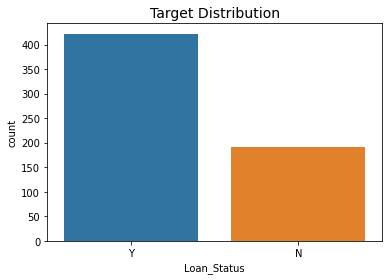

In [ ]:
_ = sns.countplot(train['Loan_Status'])
_ = plt.title("Target Distribution", fontsize=14)

Variable Datatypes

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We should check if our dataset has any duplicates rows and drop them

In [ ]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = train[train.duplicated()]
print("Total Duplicate Rows except first occurrence based on all columns are :")
duplicateRowsDF.shape

Total Duplicate Rows except first occurrence based on all columns are :


(0, 13)

Null Values

In [ ]:
null_values_per_variable = 100 * (train.isnull().sum()/train.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending=False)

Credit_History       8.1
Self_Employed        5.2
LoanAmount           3.6
Dependents           2.4
Loan_Amount_Term     2.3
Gender               2.1
Married              0.5
Loan_Status          0.0
Property_Area        0.0
CoapplicantIncome    0.0
ApplicantIncome      0.0
Education            0.0
Loan_ID              0.0
dtype: float64

Checking the missing values

In [ ]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
missing_values_table(train)

Your selected dataframe has 13 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
Credit_History,50,8.1
Self_Employed,32,5.2
LoanAmount,22,3.6
Dependents,15,2.4
Loan_Amount_Term,14,2.3
Gender,13,2.1
Married,3,0.5


In [ ]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
train[(train.isna().sum(axis=1)>0)==True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,LP002933,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y


categorical we can fill them with the mode (the value with the highest frequency)

In [ ]:
#categorical
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)

For numerical values a good solution is to fill missing values with the mean 

In [ ]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

turn loan status into binary 

In [ ]:
modified_train=train
modified_train['Loan_Status']=train['Loan_Status'].apply(lambda x: 0 if x=="N" else 1 )

Data Visualisation

Analyzing Each Variable & their relationships There are two types of features that we have:

Categorical Numerical

Also our target is Binary

For each feature type we will be perform two types of analysis:

Univariate: Analyze 1 feature at a time

Bivariate: Analyze the relationship of that feature with target variable, i.e. 'Loan_Status'


Univariate Analysis - Pie Charts.

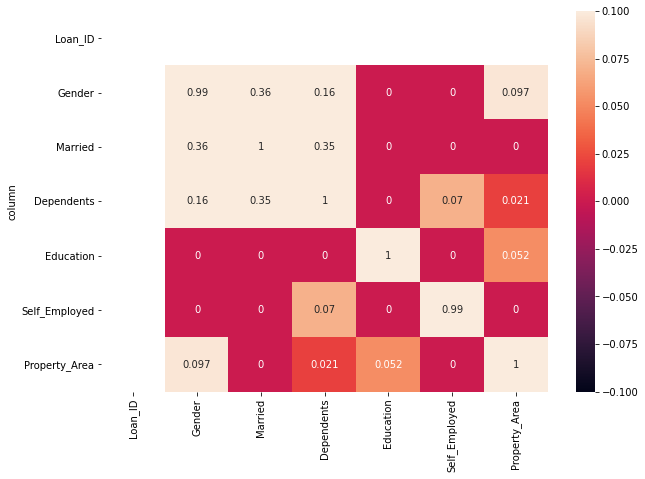

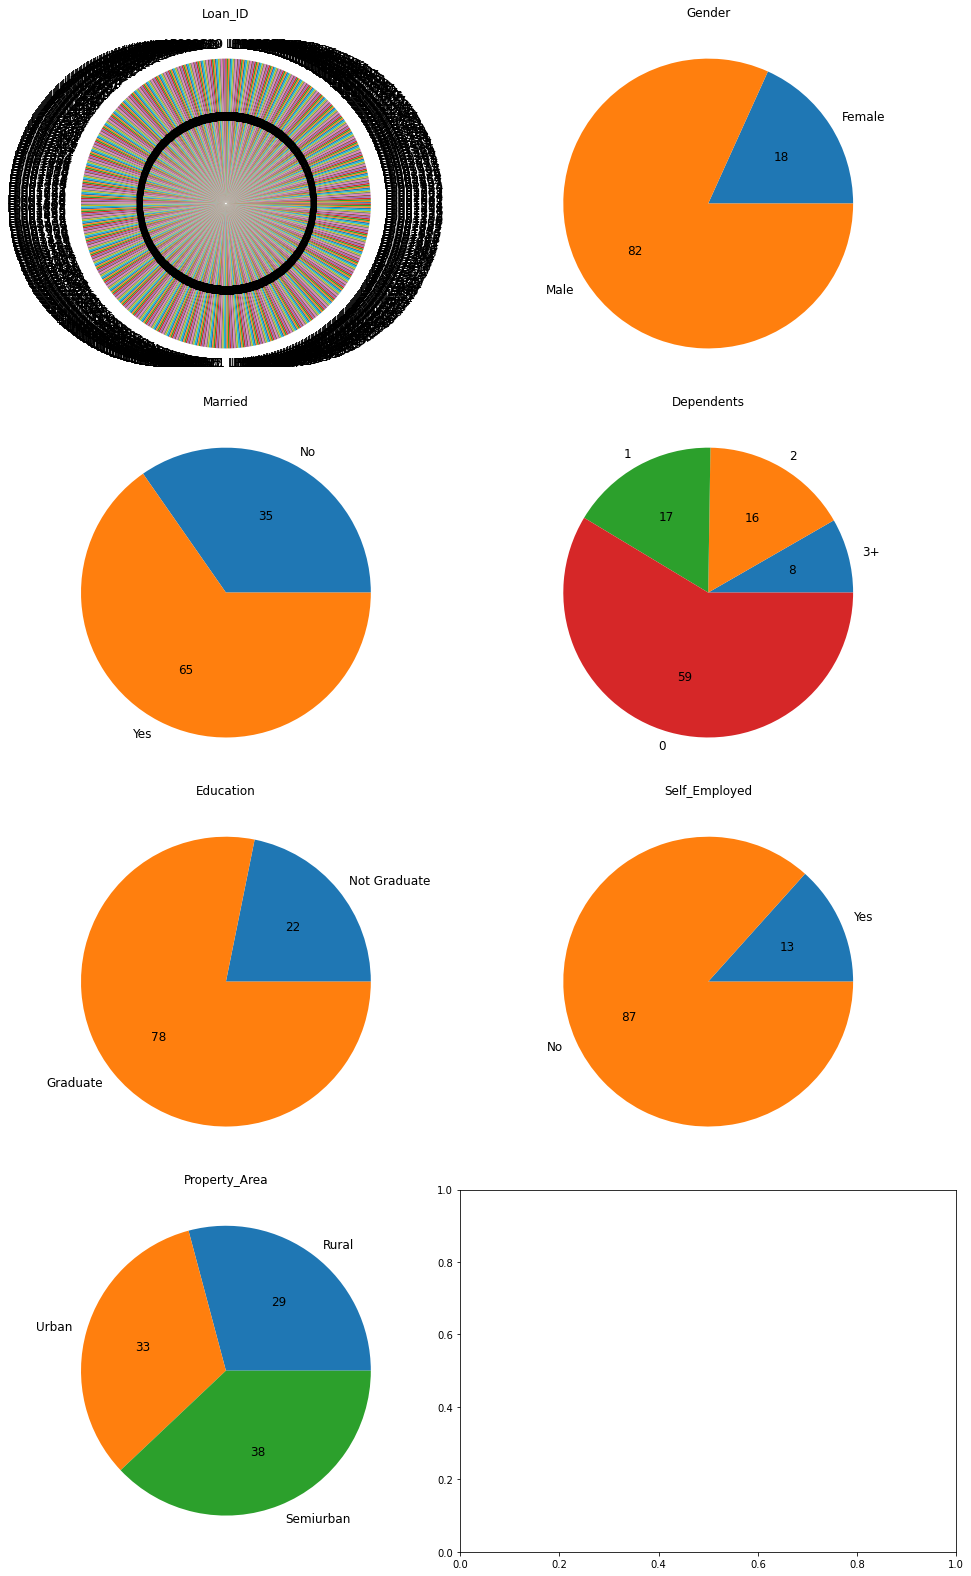

In [ ]:
modified_train.columns
cat_cols =modified_train.select_dtypes(include='O').columns.tolist()
cat_cols

from scipy.stats import chi2_contingency
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))



categorical=['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']
cramers=pd.DataFrame({i:[cramers_v(train[i],train[j]) for j in categorical] for i in categorical})
cramers['column']=[i for i in categorical if i not in ['memberid']]
cramers.set_index('column',inplace=True)

#categorical correlation heatmap

plt.figure(figsize=(10,7))
sns.heatmap(cramers,annot=True)
plt.show()

fig, axes = plt.subplots(4, 2, figsize=(14, 22))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(modified_train[cat_cols]):
    _ = modified_train[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, autopct='%.0f', fontsize=12)
    _ = axes[i].set_ylabel('')
    
_ = plt.tight_layout()

Bivariate Analysis Relationships with Target

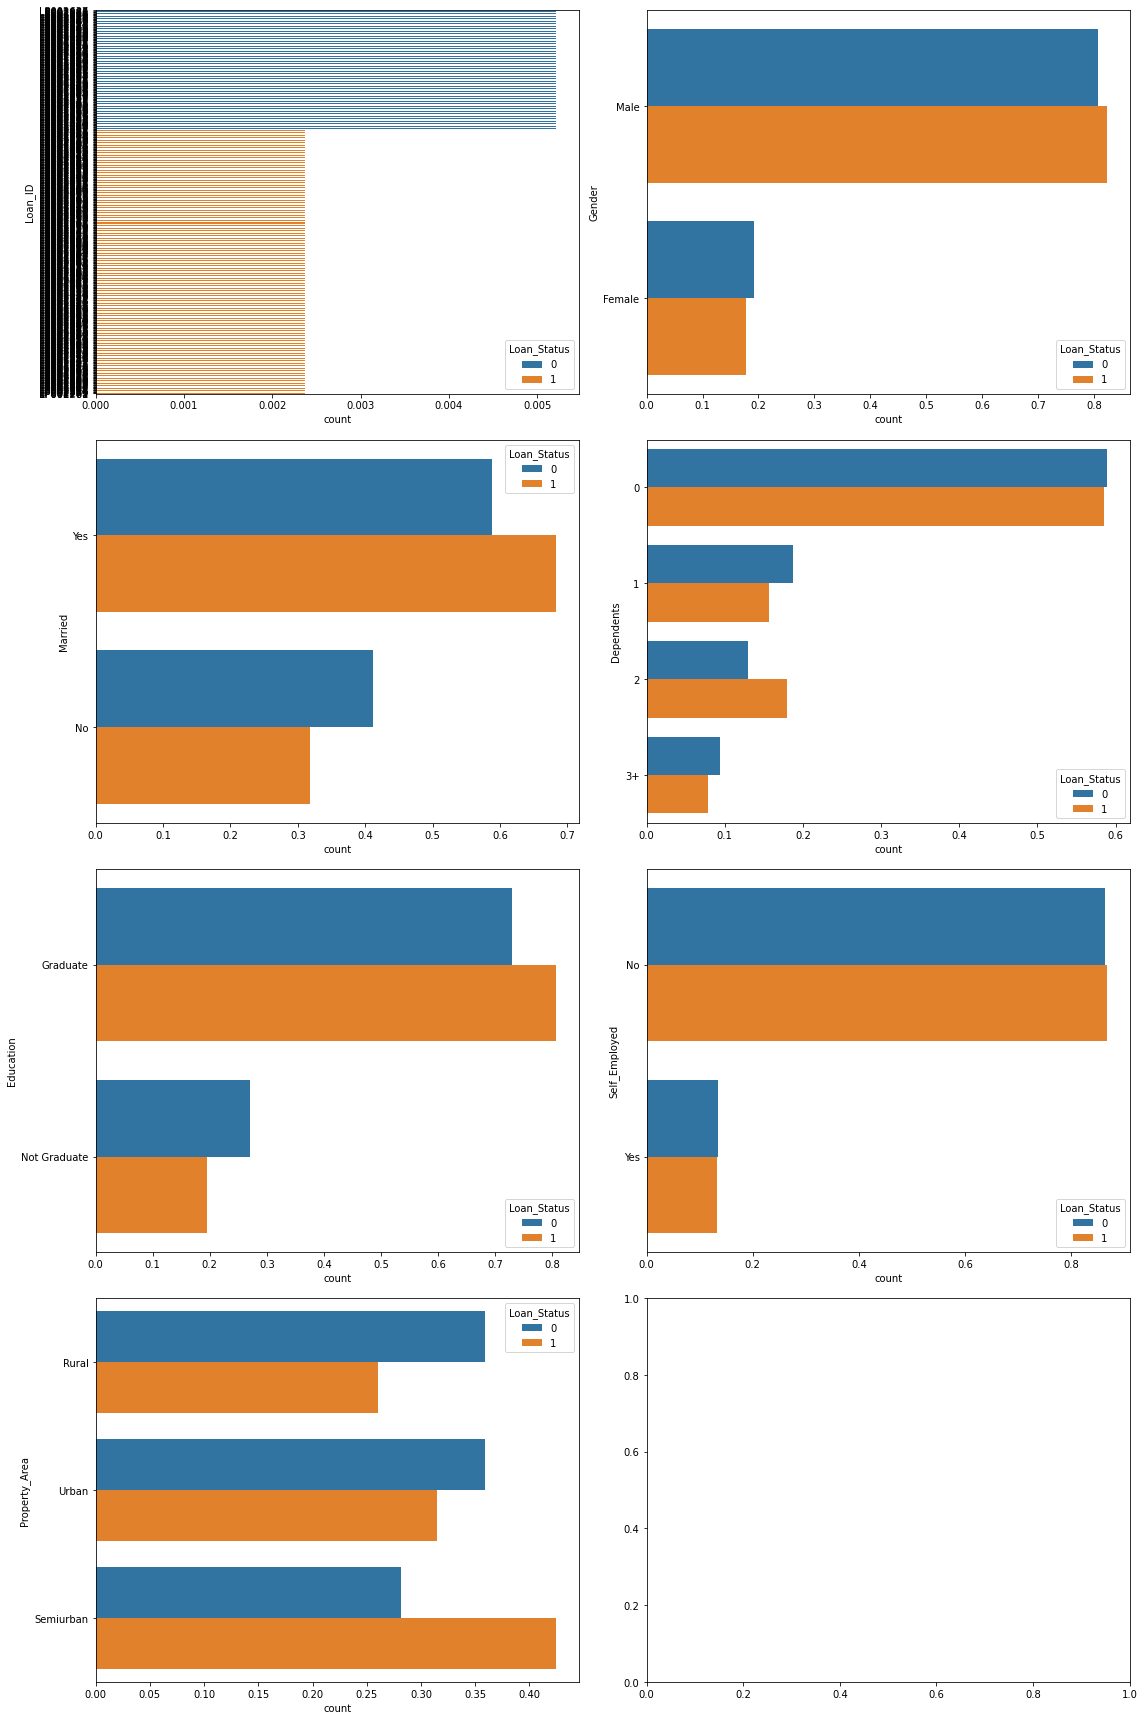

In [ ]:
TARGET_COL='Loan_Status'
fig, axes = plt.subplots(4, 2, figsize=(16, 24))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(modified_train[cat_cols]):
    fltr = modified_train[TARGET_COL] == 0
    vc_a = modified_train[fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

    vc_b = modified_train[~fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

    vc_a[TARGET_COL] = 0
    vc_b[TARGET_COL] = 1

    df = pd.concat([vc_a, vc_b]).reset_index(drop = True)

    _ = sns.barplot(y = c, x = 'count', data =df , hue=TARGET_COL, ax=axes[i])
    
_ = plt.tight_layout()

Numerical Features

In [ ]:
num_cols= modified_train.select_dtypes(exclude='O').columns.tolist()
num_cols




['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Loan_Status']

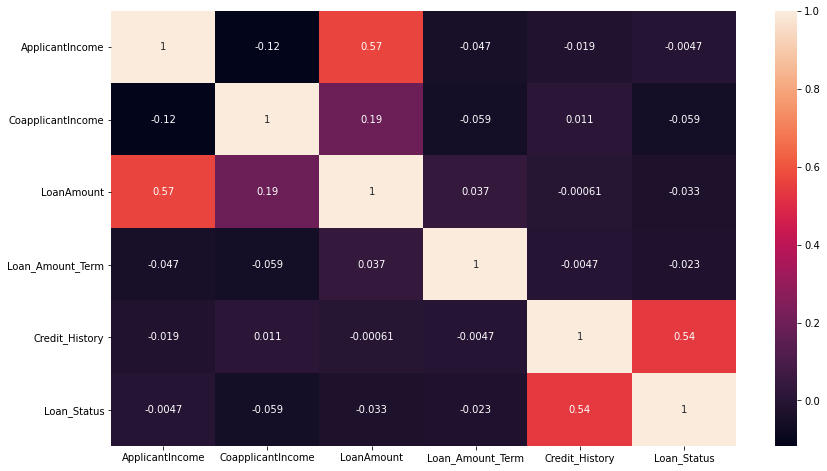

In [ ]:
plt.figure(figsize=(14, 8))
_ = sns.heatmap(modified_train[num_cols].corr(), annot=True)

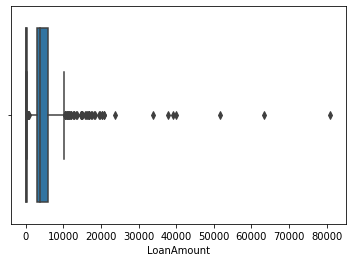

In [ ]:
num_cols=['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

sns.boxplot(x=modified_train["ApplicantIncome"])

sns.boxplot(x=modified_train["LoanAmount"])

Bivariate Analysis Bar plots - Relationships with Target Variable.

In [ ]:
modified_train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [ ]:
data = pd.get_dummies(modified_train,columns=['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area'],drop_first=True)

In [ ]:
data

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,5849,0.0,128.0,360.0,1.0,1,1,0,0,0,0,0,0,0,1
1,LP001003,4583,1508.0,128.0,360.0,1.0,0,1,1,1,0,0,0,0,0,0
2,LP001005,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,0,0,1,0,1
3,LP001006,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,0,1,0,0,1
4,LP001008,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2900,0.0,71.0,360.0,1.0,1,0,0,0,0,0,0,0,0,0
610,LP002979,4106,0.0,40.0,180.0,1.0,1,1,1,0,0,1,0,0,0,0
611,LP002983,8072,240.0,253.0,360.0,1.0,1,1,1,1,0,0,0,0,0,1
612,LP002984,7583,0.0,187.0,360.0,1.0,1,1,1,0,1,0,0,0,0,1


In [ ]:
data.drop(['Loan_ID'], axis=1, inplace=True)

In [ ]:
data_test = pd.get_dummies(test,columns=['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area'],drop_first=True)

In [ ]:
data_test

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,5720,0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1
1,LP001022,3076,1500,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1
2,LP001031,5000,1800,208.0,360.0,1.0,1,1,0,1,0,0,0,0,1
3,LP001035,2340,2546,100.0,360.0,NaN,1,1,0,1,0,0,0,0,1
4,LP001051,3276,0,78.0,360.0,1.0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,4009,1777,113.0,360.0,1.0,1,1,0,0,1,1,1,0,1
363,LP002975,4158,709,115.0,360.0,1.0,1,1,0,0,0,0,0,0,1
364,LP002980,3250,1993,126.0,360.0,NaN,1,0,0,0,0,0,0,1,0
365,LP002986,5000,2393,158.0,360.0,1.0,1,1,0,0,0,0,0,0,0


In [ ]:
test_dataset=data_test.copy()

In [ ]:
data_test

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,5720,0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1
1,LP001022,3076,1500,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1
2,LP001031,5000,1800,208.0,360.0,1.0,1,1,0,1,0,0,0,0,1
3,LP001035,2340,2546,100.0,360.0,NaN,1,1,0,1,0,0,0,0,1
4,LP001051,3276,0,78.0,360.0,1.0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,4009,1777,113.0,360.0,1.0,1,1,0,0,1,1,1,0,1
363,LP002975,4158,709,115.0,360.0,1.0,1,1,0,0,0,0,0,0,1
364,LP002980,3250,1993,126.0,360.0,NaN,1,0,0,0,0,0,0,1,0
365,LP002986,5000,2393,158.0,360.0,1.0,1,1,0,0,0,0,0,0,0


In [ ]:
data_test['Loan_Amount_Term'].fillna(data_test['Loan_Amount_Term'].mode()[0], inplace=True)
data_test['Credit_History'].fillna(data_test['Credit_History'].mode()[0], inplace=True)


In [ ]:
#numerical
data_test['LoanAmount'].fillna(data_test['LoanAmount'].median(), inplace=True)

In [ ]:
data_test

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,5720,0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1
1,LP001022,3076,1500,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1
2,LP001031,5000,1800,208.0,360.0,1.0,1,1,0,1,0,0,0,0,1
3,LP001035,2340,2546,100.0,360.0,1.0,1,1,0,1,0,0,0,0,1
4,LP001051,3276,0,78.0,360.0,1.0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,4009,1777,113.0,360.0,1.0,1,1,0,0,1,1,1,0,1
363,LP002975,4158,709,115.0,360.0,1.0,1,1,0,0,0,0,0,0,1
364,LP002980,3250,1993,126.0,360.0,1.0,1,0,0,0,0,0,0,1,0
365,LP002986,5000,2393,158.0,360.0,1.0,1,1,0,0,0,0,0,0,0


In [ ]:
data_test.drop(['Loan_ID'], axis=1, inplace=True)

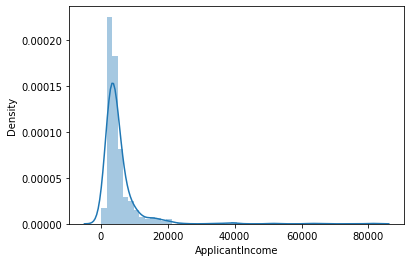

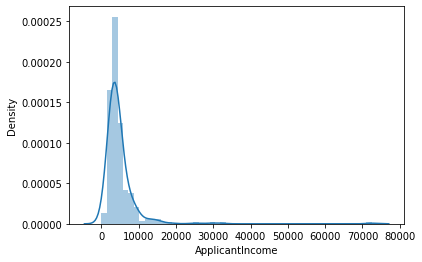

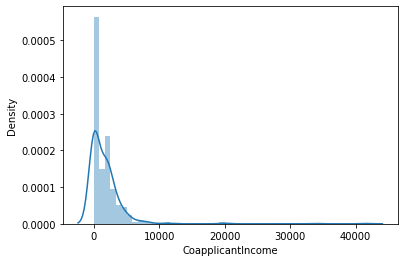

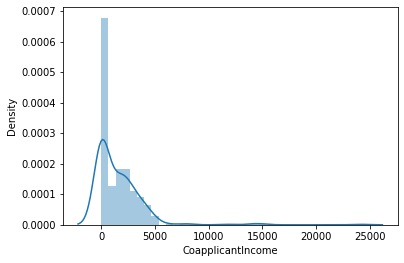

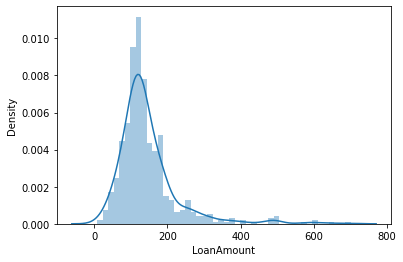

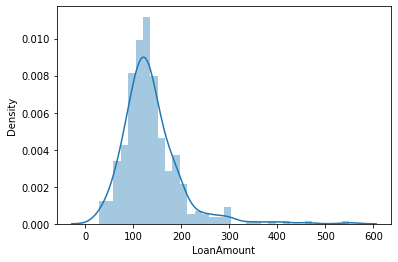

In [ ]:
sns.distplot(data['ApplicantIncome'])
plt.show()
sns.distplot(data_test['ApplicantIncome'])
plt.show()
sns.distplot(data['CoapplicantIncome'])
plt.show()
sns.distplot(data_test['CoapplicantIncome'])
plt.show()
sns.distplot(data['LoanAmount'])
plt.show()
sns.distplot(data_test['LoanAmount'])
plt.show()

In [ ]:
data['LoanAmount_log']=np.log(data['LoanAmount'])


In [ ]:
data_test['LoanAmount_log']=np.log(data_test['LoanAmount'])


In [ ]:
data['Total_Income']=data['ApplicantIncome'] + data['CoapplicantIncome']
data_test['Total_Income']=data_test['ApplicantIncome'] + data_test['CoapplicantIncome']


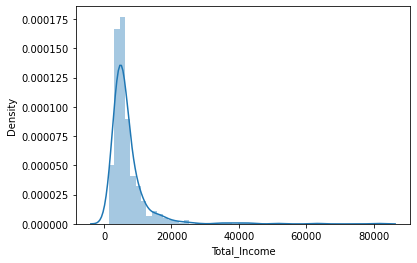

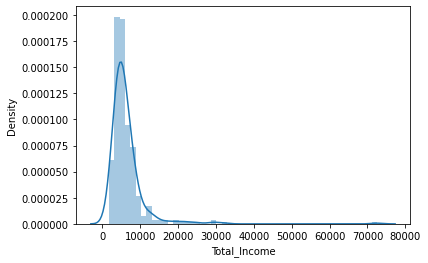

In [ ]:
sns.distplot(data['Total_Income'])
plt.show()
sns.distplot(data_test['Total_Income'])
plt.show()

In [ ]:
data['Total_Income_log']=np.log(data['Total_Income'])
data_test['Total_Income_log']=np.log(data_test['Total_Income'])

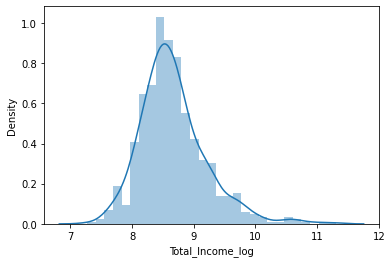

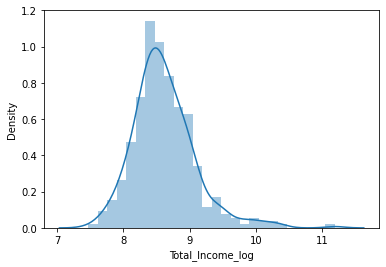

In [ ]:
sns.distplot(data['Total_Income_log'])
plt.show()
sns.distplot(data_test['Total_Income_log'])
plt.show()

In [ ]:
data['EMI']=data['LoanAmount']/data['Loan_Amount_Term']
data_test['EMI']=data_test['LoanAmount']/data_test['Loan_Amount_Term']

In [ ]:
data['EMIlog']=np.log(data['EMI'])
data_test['EMIlog']=np.log(data_test['EMI'])

In [ ]:
data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,LoanAmount_log,Total_Income,Total_Income_log,EMI,EMIlog
0,5849,0.0,128.0,360.0,1.0,1,1,0,0,0,0,0,0,0,1,4.852030,5849.0,8.674026,0.355556,-1.034074
1,4583,1508.0,128.0,360.0,1.0,0,1,1,1,0,0,0,0,0,0,4.852030,6091.0,8.714568,0.355556,-1.034074
2,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,0,0,1,0,1,4.189655,3000.0,8.006368,0.183333,-1.696449
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,0,1,0,0,1,4.787492,4941.0,8.505323,0.333333,-1.098612
4,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,0,0,0,1,4.948760,6000.0,8.699515,0.391667,-0.937344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,0,0,0,0,0,0,0,0,0,4.262680,2900.0,7.972466,0.197222,-1.623424
610,4106,0.0,40.0,180.0,1.0,1,1,1,0,0,1,0,0,0,0,3.688879,4106.0,8.320205,0.222222,-1.504077
611,8072,240.0,253.0,360.0,1.0,1,1,1,1,0,0,0,0,0,1,5.533389,8312.0,9.025456,0.702778,-0.352715
612,7583,0.0,187.0,360.0,1.0,1,1,1,0,1,0,0,0,0,1,5.231109,7583.0,8.933664,0.519444,-0.654995


In [ ]:
data_test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,LoanAmount_log,Total_Income,Total_Income_log,EMI,EMIlog
0,5720,0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1,4.700480,5720,8.651724,0.305556,-1.185624
1,3076,1500,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1,4.836282,4576,8.428581,0.350000,-1.049822
2,5000,1800,208.0,360.0,1.0,1,1,0,1,0,0,0,0,1,5.337538,6800,8.824678,0.577778,-0.548566
3,2340,2546,100.0,360.0,1.0,1,1,0,1,0,0,0,0,1,4.605170,4886,8.494129,0.277778,-1.280934
4,3276,0,78.0,360.0,1.0,1,0,0,0,0,1,0,0,1,4.356709,3276,8.094378,0.216667,-1.529395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0,1,1,0,0,1,1,1,0,1,4.727388,5786,8.663196,0.313889,-1.158716
363,4158,709,115.0,360.0,1.0,1,1,0,0,0,0,0,0,1,4.744932,4867,8.490233,0.319444,-1.141172
364,3250,1993,126.0,360.0,1.0,1,0,0,0,0,0,0,1,0,4.836282,5243,8.564649,0.350000,-1.049822
365,5000,2393,158.0,360.0,1.0,1,1,0,0,0,0,0,0,0,5.062595,7393,8.908289,0.438889,-0.823509


In [ ]:
data=data.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Total_Income','EMI'], axis=1)
data_test=data_test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Total_Income','EMI'], axis=1)

In [ ]:
X = data.drop(['Loan_Status'],axis=1)
y = data['Loan_Status']

In [ ]:
X.dtypes

Credit_History             float64
Gender_Male                  uint8
Married_Yes                  uint8
Dependents_1                 uint8
Dependents_2                 uint8
Dependents_3+                uint8
Education_Not Graduate       uint8
Self_Employed_Yes            uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
LoanAmount_log             float64
Total_Income_log           float64
EMIlog                     float64
dtype: object

In [ ]:
for x in X.columns:
  X[x]=X[x].astype(int)
  df_types = X.dtypes.value_counts()
print(df_types)

int64    13
dtype: int64


[0.39270222 0.05325633 0.0389263  0.040157   0.02770135 0.02888339
 0.04629875 0.04961189 0.04289662 0.03853799 0.07540726 0.09449115
 0.07112974]


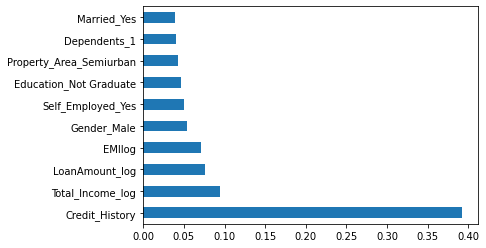

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model_features_importance=ExtraTreesClassifier()
model_features_importance.fit(X,y)
print(model_features_importance.feature_importances_)
ranked_features=pd.Series(model_features_importance.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import precision_score, recall_score,confusion_matrix,accuracy_score,f1_score,roc_auc_score
from sklearn.model_selection import cross_val_score


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =0)

              precision    recall  f1-score   support

           0       0.88      0.41      0.56        51
           1       0.81      0.98      0.89       134

    accuracy                           0.82       185
   macro avg       0.84      0.69      0.72       185
weighted avg       0.83      0.82      0.80       185

[[ 21  30]
 [  3 131]]
Accuracy of prediction: 0.822
F1 score of model is               0.7976765918460834


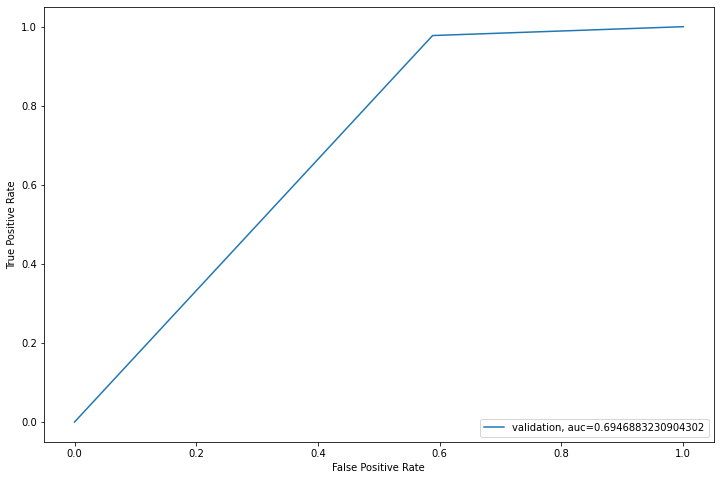

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

ypred = model.predict(X_test)

print(classification_report(y_test,ypred))
cm=confusion_matrix(y_test,ypred)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))
print('F1 score of model is              ',f1_score(y_test,ypred,average='weighted'))

fpr, tpr, _ = metrics.roc_curve(y_test, ypred)
auc = metrics.roc_auc_score(y_test, ypred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

              precision    recall  f1-score   support

           0       0.66      0.53      0.59        51
           1       0.83      0.90      0.86       134

    accuracy                           0.79       185
   macro avg       0.75      0.71      0.73       185
weighted avg       0.79      0.79      0.79       185

[[ 27  24]
 [ 14 120]]
Accuracy of prediction: 0.795
F1 score of model is               0.7871255991681391


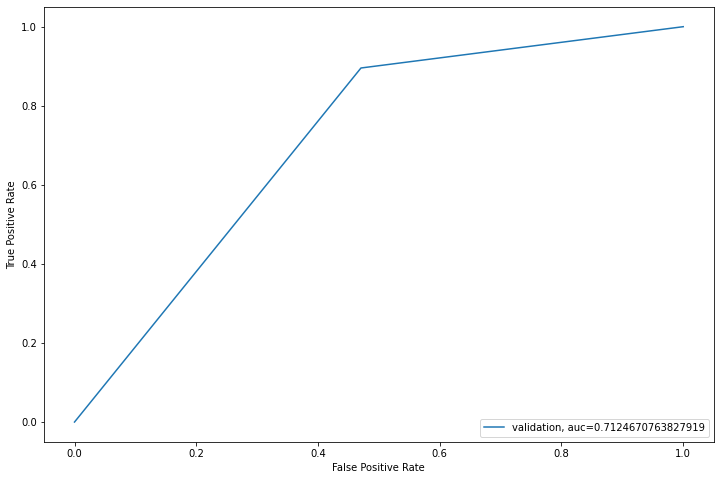

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

ran_pred = rfc.predict(X_test)

print(classification_report(y_test,ran_pred))
cm=confusion_matrix(y_test,ran_pred)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))
print('F1 score of model is              ',f1_score(y_test,ran_pred,average='weighted'))

fpr, tpr, _ = metrics.roc_curve(y_test, ran_pred)
auc = metrics.roc_auc_score(y_test, ran_pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
#hyperparameter RandomizedSearchCV
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2,4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)
rf_randomcv.best_params_
rf_randomcv
best_random_grid=rf_randomcv.best_estimator_
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.2min finished


[[ 21  30]
 [  2 132]]
Accuracy Score 0.827027027027027
Classification report:               precision    recall  f1-score   support

           0       0.91      0.41      0.57        51
           1       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185



In [ ]:
rf_randomcv.best_params_

{'criterion': 'gini',
 'max_depth': 120,
 'max_features': 'sqrt',
 'min_samples_leaf': 6,
 'min_samples_split': 5,
 'n_estimators': 1400}

              precision    recall  f1-score   support

           0       0.91      0.41      0.57        51
           1       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185

[[ 21  30]
 [  2 132]]
Accuracy of prediction: 0.827
F1 score of model is               0.8024835646457268


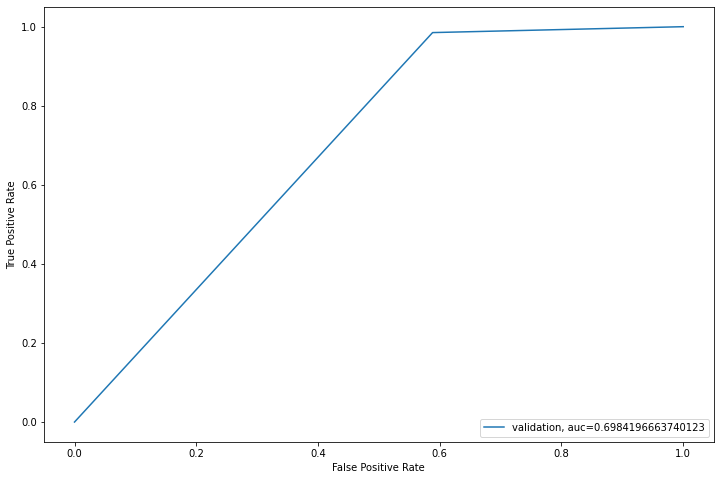

In [ ]:
rfc1 = RandomForestClassifier(class_weight={0:2,1:1.6},
                       criterion='gini', max_depth=120,
                       min_samples_leaf=6, min_samples_split=5, n_estimators=1400)
rfc1.fit(X_train, y_train)
rfc1_pred = rfc1.predict(X_test)



print(classification_report(y_test,rfc1_pred))

cm=confusion_matrix(y_test,rfc1_pred)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))
print('F1 score of model is              ',f1_score(y_test,rfc1_pred,average='weighted'))

fpr, tpr, _ = metrics.roc_curve(y_test, rfc1_pred)
auc = metrics.roc_auc_score(y_test, rfc1_pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()


In [ ]:
data_test


,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,LoanAmount_log,Total_Income_log,EMIlog
0,1.0,1,1,0,0,0,0,0,0,1,4.700480,8.651724,-1.185624
1,1.0,1,1,1,0,0,0,0,0,1,4.836282,8.428581,-1.049822
2,1.0,1,1,0,1,0,0,0,0,1,5.337538,8.824678,-0.548566
3,1.0,1,1,0,1,0,0,0,0,1,4.605170,8.494129,-1.280934
4,1.0,1,0,0,0,0,1,0,0,1,4.356709,8.094378,-1.529395
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1.0,1,1,0,0,1,1,1,0,1,4.727388,8.663196,-1.158716
363,1.0,1,1,0,0,0,0,0,0,1,4.744932,8.490233,-1.141172
364,1.0,1,0,0,0,0,0,0,1,0,4.836282,8.564649,-1.049822
365,1.0,1,1,0,0,0,0,0,0,0,5.062595,8.908289,-0.823509


In [ ]:
ran_test_pred = model.predict(data_test)

In [ ]:
ran_test_pred 

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
test_dataset

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,5720,0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1
1,LP001022,3076,1500,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1
2,LP001031,5000,1800,208.0,360.0,1.0,1,1,0,1,0,0,0,0,1
3,LP001035,2340,2546,100.0,360.0,NaN,1,1,0,1,0,0,0,0,1
4,LP001051,3276,0,78.0,360.0,1.0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,4009,1777,113.0,360.0,1.0,1,1,0,0,1,1,1,0,1
363,LP002975,4158,709,115.0,360.0,1.0,1,1,0,0,0,0,0,0,1
364,LP002980,3250,1993,126.0,360.0,NaN,1,0,0,0,0,0,0,1,0
365,LP002986,5000,2393,158.0,360.0,1.0,1,1,0,0,0,0,0,0,0


In [ ]:
submission=pd.DataFrame({'Loan_ID' : test_dataset['Loan_ID'],'Loan_Status':ran_test_pred,})

In [ ]:
submission

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [ ]:
submission['Loan_Status']=submission['Loan_Status'].apply(lambda x: "Y" if x==1 else "N" )

In [ ]:
submission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y
